In [1]:
import pandas as pd

In [2]:
sp = pd.read_csv('Startups.csv')

In [3]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
sp.State.describe()

count             50
unique             3
top       California
freq              17
Name: State, dtype: object

In [5]:
states = pd.get_dummies(sp.State)

In [6]:
states = states.drop(states.columns[0],1)

In [7]:
sp = pd.concat([sp,states],axis=1)

In [8]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0
5,131876.90,99814.71,362861.36,New York,156991.12,0,1
6,134615.46,147198.87,127716.82,California,156122.51,0,0
7,130298.13,145530.06,323876.68,Florida,155752.60,1,0
8,120542.52,148718.95,311613.29,New York,152211.77,0,1
9,123334.88,108679.17,304981.62,California,149759.96,0,0


In [9]:
sp = sp.drop('State',1)

In [10]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


# Normialize the Data

In [11]:
def Normalize(data):
    return ((data - data.min())/(data.max()-data.min()))

In [12]:
sp = sp.apply(Normalize)

In [13]:
sp.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,1.000000,0.651744,1.000000,1.000000,0.0,1.0
1,0.983359,0.761972,0.940893,0.997355,0.0,0.0
2,0.927985,0.379579,0.864664,0.993178,1.0,0.0
3,0.873136,0.512998,0.812235,0.947292,0.0,1.0
4,0.859438,0.305328,0.776136,0.853171,1.0,0.0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

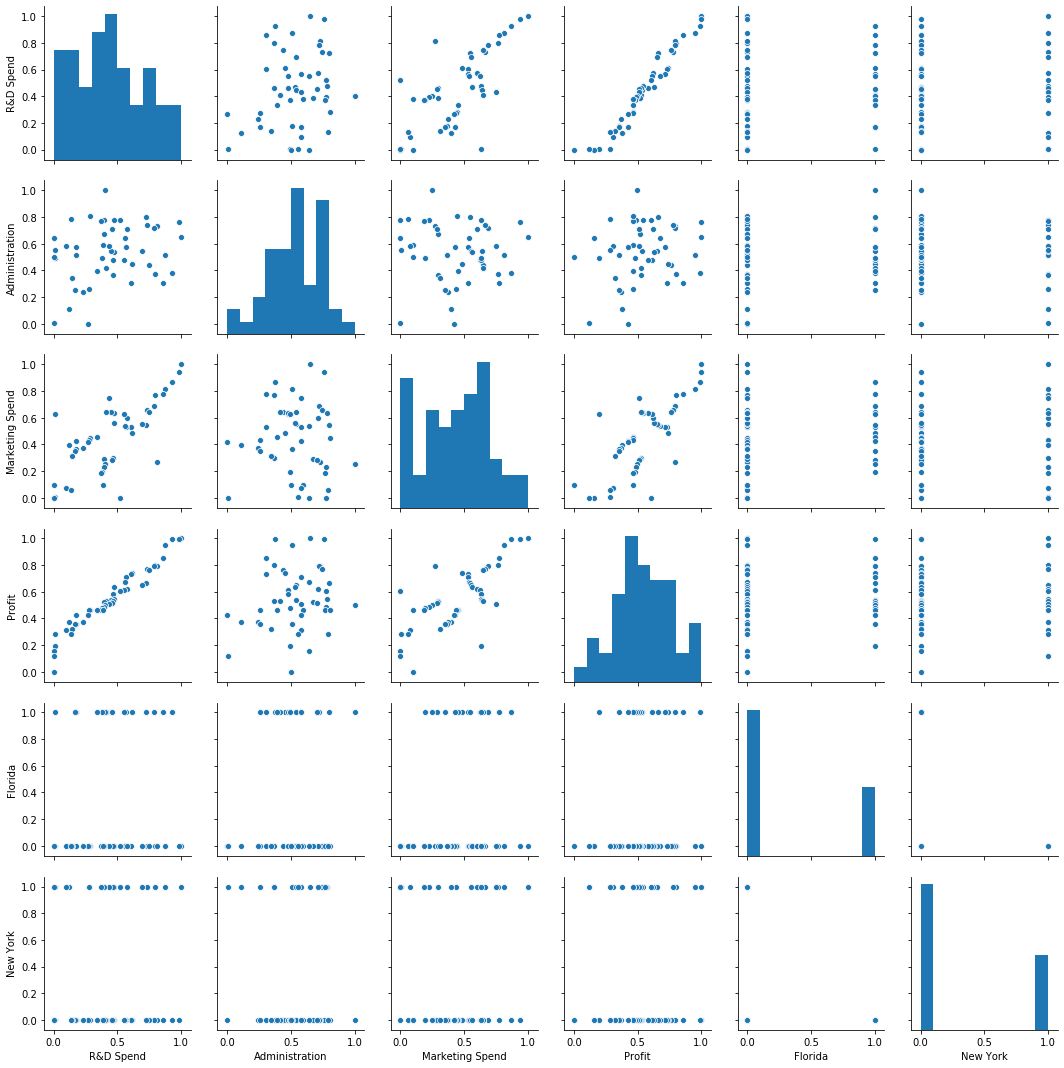

In [15]:
sns.pairplot(data = sp)

plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [60]:
xTrain, xTest, yTrain, yTest = train_test_split(sp[['R&D Spend','Administration','Marketing Spend','Florida','New York']
                                                  ],sp.Profit,test_size=0.2)

In [61]:
import statsmodels.api as sm 

In [62]:
xTrain = sm.add_constant(xTrain)

In [63]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [64]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     136.8
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           1.66e-21
Time:                        15:47:10   Log-Likelihood:                 62.807
No. Observations:                  40   AIC:                            -113.6
Df Residuals:                      34   BIC:                            -103.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1891      0.030     

# Calculating the VIF

In [32]:
def vif_cal(input_data, dependent_col):
    
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    
    xvar_names=x_vars.columns
    
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
        
        
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [34]:
# Calculating Vif value|
vif_cal(input_data=sp, dependent_col="Profit")

,Var,Vif
0,R&D Spend,8.83
2,Marketing Spend,7.95
1,Administration,3.95
3,Florida,1.95
4,New York,1.83


In [66]:
xTrain = xTrain.drop('Marketing Spend',1)

In [67]:
xTrain.head()

,const,R&D Spend,Administration,Florida,New York
20,1.0,0.461169,0.476424,0.0,0.0
44,1.0,0.134127,0.788072,0.0,0.0
29,1.0,0.396769,0.774566,0.0,1.0
49,1.0,0.000000,0.500148,0.0,0.0
19,1.0,0.522650,0.778236,0.0,1.0


In [68]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [69]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     172.8
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           1.58e-22
Time:                        15:50:19   Log-Likelihood:                 62.464
No. Observations:                  40   AIC:                            -114.9
Df Residuals:                      35   BIC:                            -106.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2002      0.026      7.

In [70]:
vif_cal(input_data=sp.drop('Marketing Spend',1), dependent_col="Profit")

,Var,Vif
1,Administration,3.95
0,R&D Spend,3.65
2,Florida,1.78
3,New York,1.78


In [71]:
xTrain = xTrain.drop('New York',1)

In [72]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [74]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     236.6
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           9.67e-24
Time:                        15:52:59   Log-Likelihood:                 62.427
No. Observations:                  40   AIC:                            -116.9
Df Residuals:                      36   BIC:                            -110.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2023      0.024      8.

In [75]:
xTrain = xTrain.drop('Florida',1)

In [76]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [77]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     361.6
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           5.19e-25
Time:                        15:55:21   Log-Likelihood:                 62.262
No. Observations:                  40   AIC:                            -118.5
Df Residuals:                      37   BIC:                            -113.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2041      0.024      8.

In [80]:
vif_cal(input_data=sp.drop(['Marketing Spend','Florida','New York'],1), dependent_col="Profit")

,Var,Vif
0,R&D Spend,3.36
1,Administration,3.36


In [81]:
xTrain = xTrain.drop('Administration',1)

In [82]:
yPred = sm.OLS(yTrain,xTrain).fit()

In [83]:
print(yPred.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     725.5
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           2.30e-26
Time:                        15:58:05   Log-Likelihood:                 61.815
No. Observations:                  40   AIC:                            -119.6
Df Residuals:                      38   BIC:                            -116.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1876      0.015     12.350      0.0

In [84]:
print(xTrain)

    const  R&D Spend
20    1.0   0.461169
44    1.0   0.134127
29    1.0   0.396769
49    1.0   0.000000
19    1.0   0.522650
28    1.0   0.399467
45    1.0   0.006049
13    1.0   0.556352
30    1.0   0.374931
25    1.0   0.391080
37    1.0   0.266527
42    1.0   0.142976
23    1.0   0.408424
21    1.0   0.474084
15    1.0   0.692617
35    1.0   0.278284
26    1.0   0.455574
11    1.0   0.608845
4     1.0   0.859438
43    1.0   0.093776
31    1.0   0.369741
39    1.0   0.233194
27    1.0   0.436093
7     1.0   0.788018
1     1.0   0.983359
5     1.0   0.797566
47    1.0   0.000000
9     1.0   0.745906
22    1.0   0.447505
2     1.0   0.927985
46    1.0   0.007956
10    1.0   0.616351
33    1.0   0.335617
17    1.0   0.572468
3     1.0   0.873136
40    1.0   0.173901
48    1.0   0.003278
8     1.0   0.729018
36    1.0   0.173353
38    1.0   0.122345


In [120]:
x = np.array([sp['R&D Spend']]).reshape(-1,1)
y= np.array([sp['Profit']]).reshape(-1,1)

In [121]:
xTrain, xTest ,yTrain,yTest = train_test_split(x,y, test_size=0.2)

In [122]:
lr = LinearRegression()

In [123]:
rg = lr.fit(xTrain,yTrain)

In [124]:
print(rg.intercept_)
print(rg.coef_)

[0.19010279]
[[0.80082872]]


In [125]:
yPred = rg.predict(yTest)

In [126]:
from sklearn.metrics import mean_squared_error,r2_score

In [127]:
mse = mean_squared_error(yTest,yPred)
r2 = r2_score(yTest,yPred)

In [128]:
print(mse)
print(r2)

0.008827439883044524
0.7994891105775451


In [129]:
data = pd.DataFrame({'Actual':yTest.flatten(),'Predicted':yPred.flatten()})

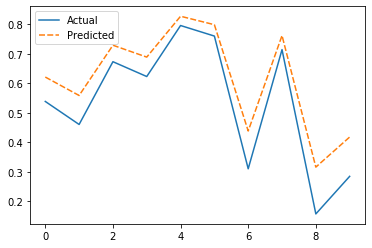

In [130]:
sns.lineplot(data =data)
plt.show()